In [1]:
import pandas as pd
import numpy as np


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("titanic_train.csv")

In [4]:
# use train.head() to see the dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

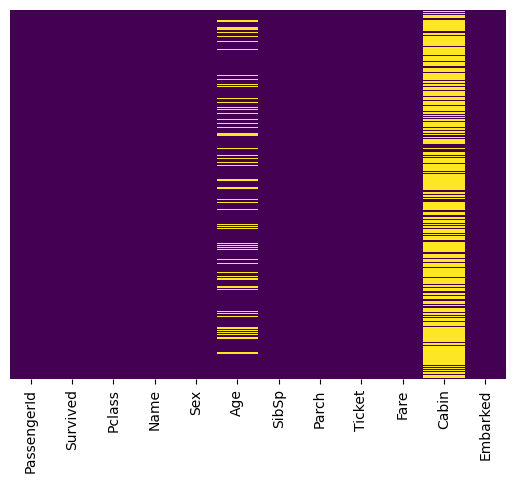

In [14]:
# find missing data
train.isnull()
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')


In [23]:
sns.set_style('whitegrid')


<Axes: xlabel='Survived', ylabel='count'>

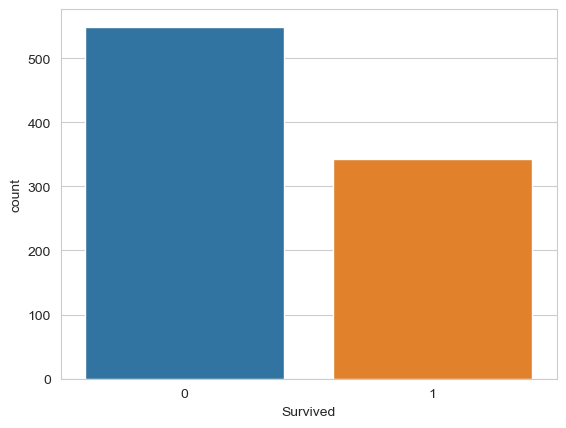

In [25]:
# check who survived and who didn't using countplot
sns.countplot(data=train, x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

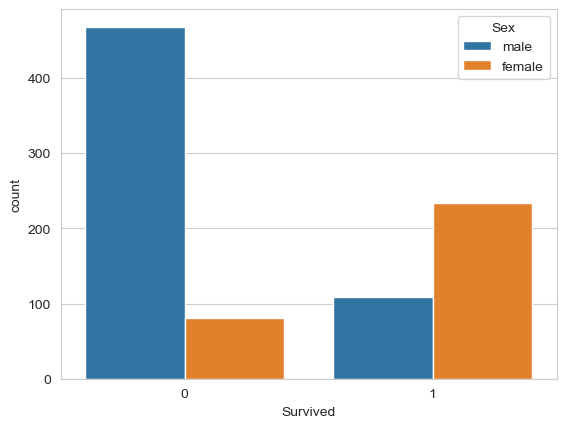

In [28]:
# check survival by sex
sns.countplot(data=train, x='Survived', hue='Sex')


<Axes: xlabel='Survived', ylabel='count'>

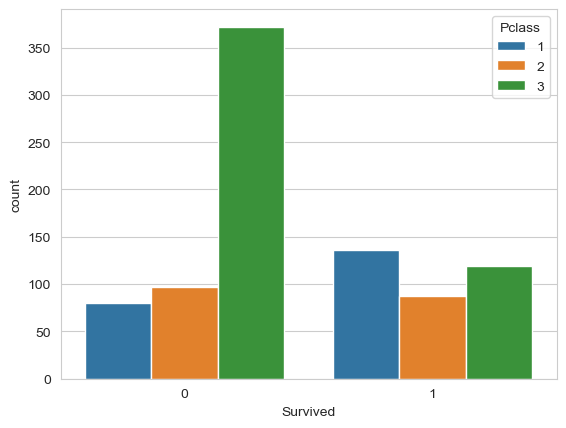

In [30]:
# check survival rate by passenger class
sns.countplot(data=train, x='Survived', hue='Pclass')
# being in third class increased chances of not surviving
# Of those that survived, first class were the first and second class last


<Axes: xlabel='Age', ylabel='Count'>

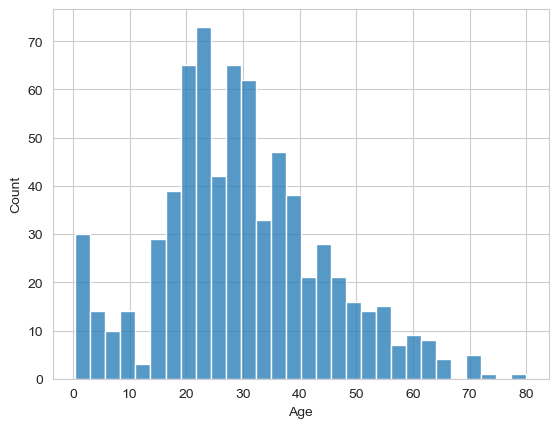

In [36]:
# check distribution of age
age=train['Age'].dropna()
sns.histplot(age, bins=30)

# most of the passengers were between ages 20 and 30

<Axes: xlabel='SibSp', ylabel='count'>

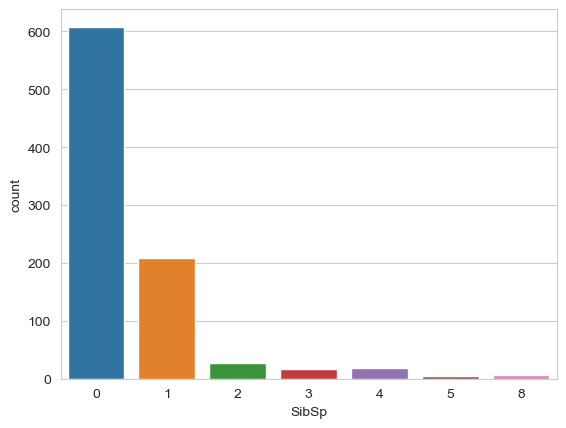

In [37]:
# explore SibSp data
sns.countplot(data=train, x='SibSp')
# most people did not have a sibling and spouse on board

<Axes: xlabel='Fare', ylabel='Count'>

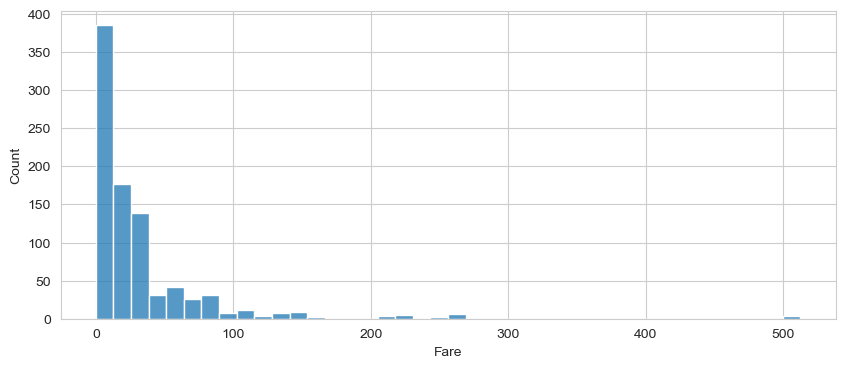

In [47]:
# checking distribution of fare
f, ax = plt.subplots(figsize=(10,4))
sns.histplot(x=train['Fare'], bins=40)


In [48]:
import cufflinks as cf
cf.go_offline()

In [50]:
# use cufflinks for a more interactive distribution of fare
train['Fare'].iplot(kind='hist',bins=50)

In [55]:
# to remove empty ages, create boxplot and to get mean


import plotly.express as px
px.box(train, x="Pclass", y='Age')

In [60]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 24
    else:
        return Age
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)



<Axes: >

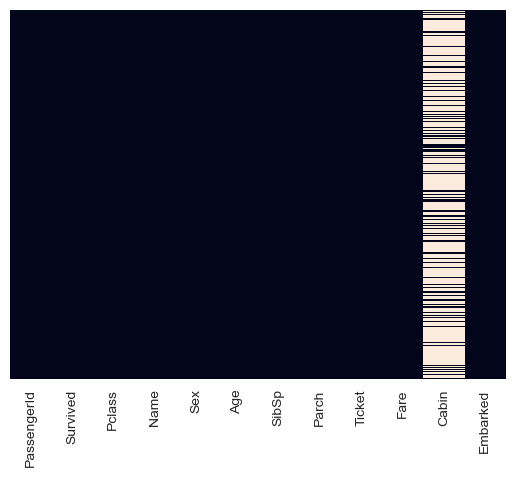

In [61]:
sns.heatmap(train.isnull(), cbar=False, yticklabels=False) 

In [63]:
# since there are too many missing values in cabin drop it
train.drop("Cabin", axis=1, inplace=True)


In [67]:
train.dropna(inplace=True)

In [85]:
#change sex and embarked into categorical data (0 or 1)
train.head()
sex = pd.get_dummies(train['Sex'],drop_first=True, dtype=float)
embark = pd.get_dummies(train['Embarked'],drop_first=True, dtype=float)
embark


,Q,S
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,0.0,1.0
888,0.0,1.0
889,0.0,0.0


In [88]:
# add sex and embark to train 
train=pd.concat([train, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0,0.0,1.0,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0,0.0,1.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0,0.0,1.0,1.0,0.0,1.0


In [92]:
# pd.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0,1.0,0.0,1.0


In [94]:
train.drop('PassengerId', axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0,1.0,0.0,1.0


In [95]:
# if you use pd.get_dummies, you will get 3 new columns for each category.
# Just like how we see in embarked


In [96]:
X= train.drop('Survived', axis=1)
y= train['Survived']

In [97]:
# split our data into train and test
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [103]:
# import Logistic regression

from sklearn.linear_model import LogisticRegression


In [110]:
# change solver to liblinear to avoid non-convergence
logmodel = LogisticRegression(solver='liblinear', n_jobs=1,multi_class='ovr')

In [111]:
logmodel.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [112]:
# predict data
predictions = logmodel.predict(X_test)

In [113]:
# model evaluation
from sklearn.metrics import classification_report

In [114]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       184
           1       0.77      0.72      0.74       110

    accuracy                           0.81       294
   macro avg       0.80      0.79      0.80       294
weighted avg       0.81      0.81      0.81       294



In [115]:
# the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[160,  24],
       [ 31,  79]], dtype=int64)

<Axes: xlabel='Survived'>

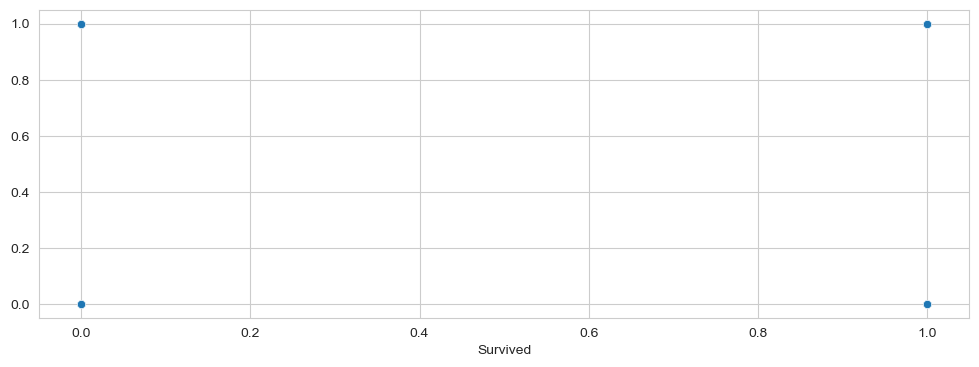